In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import linregress

%matplotlib inline

##  Import data

In [4]:
# cols = 'Year-CSIRO Adjusted Sea Level-Lower Error Bound-Upper Error Bound-NOAA Adjusted Sea Level'.split('-')
# cols = ['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound', 'NOAA Adjusted Sea Level']

In [3]:
sea = pd.read_csv('epa-sea-level.csv')
sea

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [5]:
sea.rename({'Year': 'year', 
            'CSIRO Adjusted Sea Level': 'CSIRO', 
            'Lower Error Bound': 'lower', 
            'Upper Error Bound': 'upper', 
            'NOAA Adjusted Sea Level': 'NOAA'}, 
          axis='columns', 
          inplace=True)

In [6]:
sea

,year,CSIRO,lower,upper,NOAA
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


## Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.


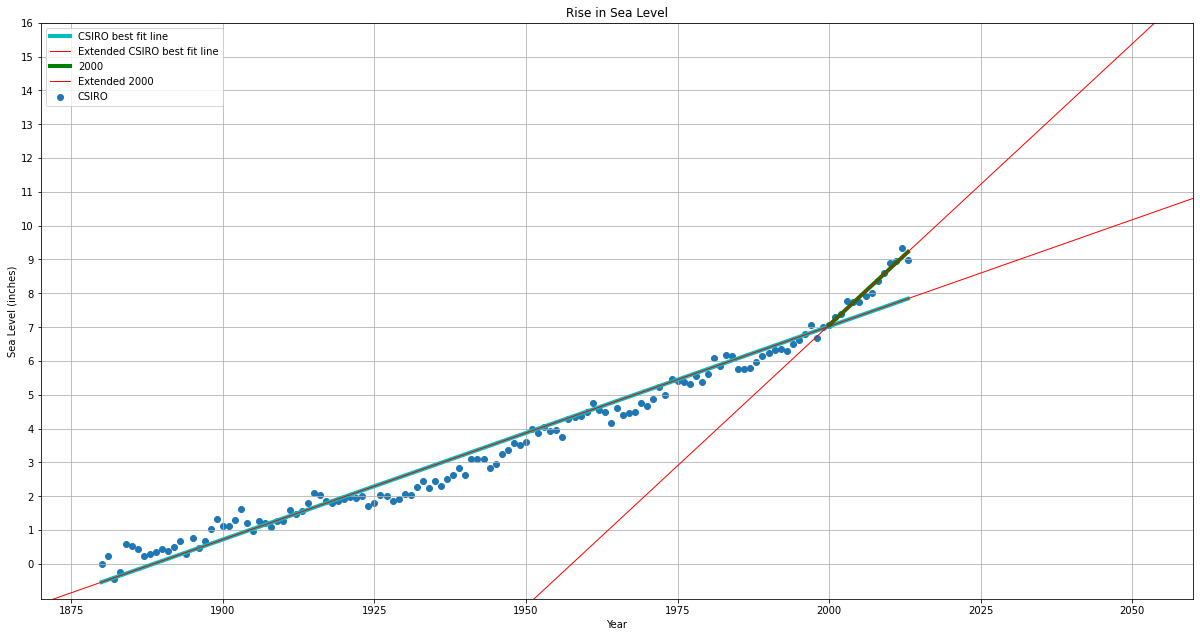

In [48]:
def draw_plot():
    # Read data from file
    global sea

    # Create scatter plot
    
    fig = plt.figure(figsize=(16, 8))
    axes = fig.add_axes([0, 0, 1, 1])

    # Add axes attributes
    axes.set_title('Rise in Sea Level')
    axes.set_xlabel('Year')
    axes.set_ylabel('Sea Level (inches)')
    axes.set_xticks([1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0])
    axes.set_yticks(list(range(0, 20)))

    axes.set_xlim((1870.0, 2060.0))
    axes.set_ylim((-1.0355688083726844, 16.0))

    # axes tuning
    plt.grid()

    # plot CSIRO data
    plt.scatter('year', 'CSIRO', data=sea)


    # Linear Regression
    # finds the line of best fit line through your data 
    # by searching for the regression coefficient (B1) that minimizes the total error (e) of the model.

    def extended(ax, x, y, **args):

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        x_ext = np.linspace(xlim[0], xlim[1], 100)
        p = np.polyfit(x, y , deg=1)

        y_ext = np.poly1d(p)(x_ext)
        ax.plot(x_ext, y_ext, **args)

        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        return ax    

    lin = linregress(sea.year, sea.CSIRO)
    # plt.plot(sea.year, (lin.intercept + lin.slope * sea.year), 'c', lw=4)


    x = sea.year
    y = (lin.intercept + lin.slope * sea.year)

    
    axes.plot(x, y, 'c', lw=4, label='CSIRO best fit line')
    axes = extended(axes, x, y,  color="r", lw=1, label="Extended CSIRO best fit line")

    





    data_x_2000 = sea.loc[sea.year >= 2000, 'year']
    data_y_2000 = sea.loc[sea.year >= 2000, 'CSIRO']
    lin2000 = linregress(data_x_2000, data_y_2000)
    x_2 = data_x_2000.copy()
    y_2 = lin2000.intercept + lin2000.slope * x_2

    axes.plot(x_2, y_2, 'g', label='2000', lw=4)
    axes = extended(axes, x_2, y_2,  color="r", lw=1, label="Extended 2000")
    



    axes.legend()
    
    # Create first line of best fit
    
    # Create second line of best fit
    
    # Save plot and return data for testing
    plt.savefig('sea_level_plot.png')
    # return plt.gca()
    return fig


fig = draw_plot()


In [49]:
ax = fig.get_axes()[0]
lines = ax.get_lines()
for l in lines:
    print()
    print(l)
    print(l.get_ydata().tolist())
    


Line2D(CSIRO best fit line)
[-0.5421240249263661, -0.4790794409142336, -0.41603485690210107, -0.35299027288996854, -0.2899456888778218, -0.22690110486568926, -0.16385652085355673, -0.1008119368414242, -0.03776735282929167, 0.025277231182840865, 0.08832181519498761, 0.15136639920712014, 0.21441098321925267, 0.2774555672313852, 0.34050015124351773, 0.40354473525565027, 0.466589319267797, 0.5296339032799295, 0.5926784872920621, 0.6557230713041946, 0.7187676553163271, 0.7818122393284597, 0.8448568233405922, 0.9079014073527389, 0.9709459913648715, 1.033990575377004, 1.0970351593891365, 1.160079743401269, 1.2231243274134016, 1.2861689114255483, 1.3492134954376809, 1.4122580794498134, 1.475302663461946, 1.5383472474740785, 1.601391831486211, 1.6644364154983577, 1.7274809995104903, 1.7905255835226228, 1.8535701675347553, 1.9166147515468879, 1.9796593355590204, 2.042703919571167, 2.1057485035832997, 2.168793087595432, 2.2318376716075647, 2.2948822556196973, 2.35792683963183, 2.4209714236439766

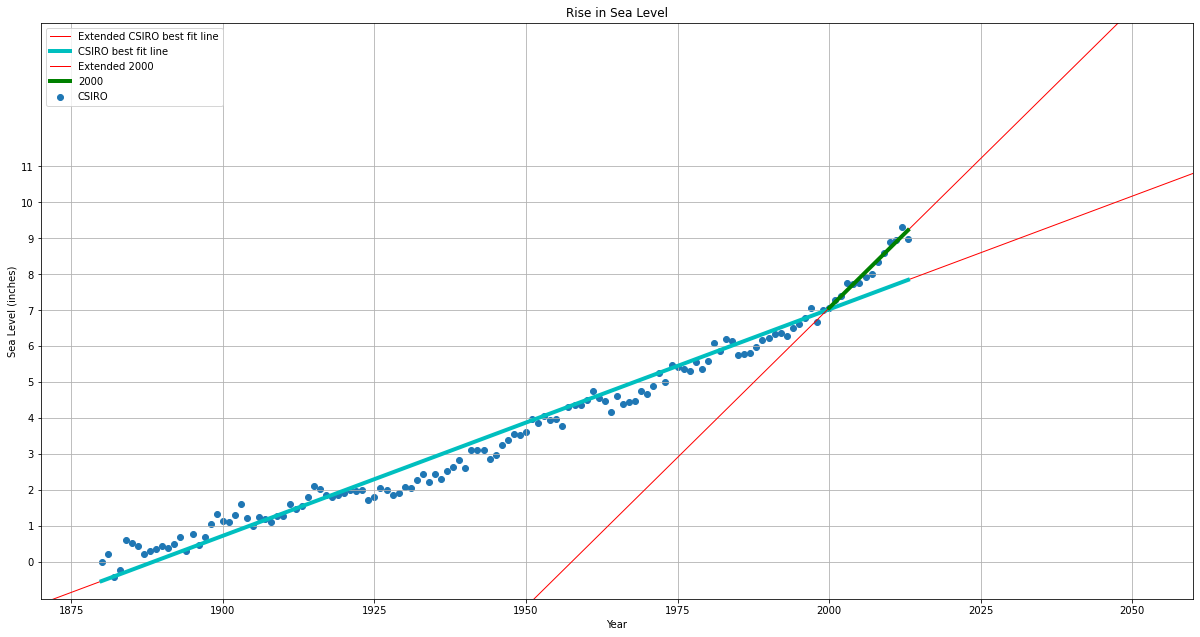

In [30]:
fig = plt.figure(figsize=(16, 8))
axes = fig.add_axes([0, 0, 1, 1])

# Add axes attributes
axes.set_title('Rise in Sea Level')
axes.set_xlabel('Year')
axes.set_ylabel('Sea Level (inches)')
axes.set_xticks([1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
axes.set_yticks(list(range(0, 12)))

axes.set_xlim((1870.0, 2060.0))
axes.set_ylim((-1.0355688083726844, 15.0))

# axes tuning
plt.grid()

# plot CSIRO data
plt.scatter('year', 'CSIRO', data=sea)


# Linear Regression
# finds the line of best fit line through your data 
# by searching for the regression coefficient (B1) that minimizes the total error (e) of the model.

def extended(ax, x, y, **args):

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x_ext = np.linspace(xlim[0], xlim[1], 100)
    p = np.polyfit(x, y , deg=1)

    y_ext = np.poly1d(p)(x_ext)
    ax.plot(x_ext, y_ext, **args)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    return ax    

lin = linregress(sea.year, sea.CSIRO)
# plt.plot(sea.year, (lin.intercept + lin.slope * sea.year), 'c', lw=4)


x = sea.year
y = (lin.intercept + lin.slope * sea.year)

axes = extended(axes, x, y,  color="r", lw=1, label="Extended CSIRO best fit line")

axes.plot(x, y, 'c', lw=4, label='CSIRO best fit line')





data_x_2000 = sea.loc[sea.year >= 2000, 'year']
data_y_2000 = sea.loc[sea.year >= 2000, 'CSIRO']
lin2000 = linregress(data_x_2000, data_y_2000)
x_2 = data_x_2000.copy()
y_2 = lin2000.intercept + lin2000.slope * x_2

axes = extended(axes, x_2, y_2,  color="r", lw=1, label="Extended 2000")
axes.plot(x_2, y_2, 'g', label='2000', lw=4)



axes.legend()

In [15]:
sea

,year,CSIRO,lower,upper,NOAA
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [13]:
'-----------'*10

'--------------------------------------------------------------------------------------------------------------'

In [ ]:
# CONFIRM PLOT LABELS
ax = fig.get_axes()[0]
title = ax.get_title()
xlabel = ax.get_xlabel()
ylabel = ax.get_ylabel()
print((title, xlabel, ylabel))

print(ax.get_xticks().tolist())
expected = [1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0]
print(expected)


In [ ]:
ax.get_xlim()

In [ ]:
ax.get_ylim()

In [ ]:
ax.get_children()[0].get_offsets().data.tolist()

In [ ]:
sea

In [ ]:
sea.CSIRO.values

In [ ]:
for i in sea.index:
    print(i, '-->', sea.year[i], '-->', sea.CSIRO[i])

In [ ]:
sea.dtypes

In [ ]:
fig = plt.figure(figsize=(16, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Rise in Sea Level')
axes.set_xlabel('Year')
axes.set_ylabel('Sea Level (inches)')



plt.grid()
plt.scatter('year', 'CSIRO', data=sea)

lin = linregress(sea.year, sea.CSIRO)
plt.plot(sea.year, (lin.intercept + lin.slope * sea.year), 'c')
axes.xaxis.lablepad = 10

In [ ]:
axes.xaxis?

In [ ]:
axes.xaxis.label

In [ ]:
sea.year

In [ ]:
lin.intercept + lin.slope * sea.year

In [ ]:
lin = linregress(sea.year, sea.CSIRO)
lin

In [ ]:
plt.plot(sea.year, (lin.intercept + lin.slope * sea.year))

##  Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [ ]:
linregress?

In [ ]:
# generate data
from scipy import stats

np.random.seed(12345678)

x = np.random.random(10)
print('x is:', x)

y = 1.6*x + np.random.random(10)
print('y is:', y)

# Perform the linear regression:
res = stats.linregress(x, y)
print(res)

print(f"R-squared: {res.rvalue**2:.6f}")
# R-squared: 0.735498

# Plot the data along with the fitted line:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()


In [ ]:
res.intercept

In [ ]:
res.slope

In [ ]:
res?